<a href="https://colab.research.google.com/github/shivendra1-cyber/CltandconfidenceInterval/blob/main/CLTandCONFIDENCEinterval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#CONFIDENCE INTERVAL

we want a range such that 95 % chance of the population being inside it

In [34]:
survey_1=[35,36,33,37,34,35]
np.mean(survey_1)

35.0

In [35]:
survey_2=[20,37,17,50,53,33]
np.mean(survey_2)

35.0

both surveys have same mean but still we have more confidence in survey2

BOOTSTRAPPING

In [36]:
n=6

In [37]:
survey_1

[35, 36, 33, 37, 34, 35]

In [38]:
np.random.choice(survey_1,size= n)

array([34, 35, 33, 35, 33, 35])

In [39]:
bootstrapped_samples=np.random.choice(survey_1,size= n)
np.mean(bootstrapped_samples)

35.0

In [40]:
survey_2

[20, 37, 17, 50, 53, 33]

In [41]:
bootstrapped_samples=np.random.choice(survey_2,size= n)
np.mean(bootstrapped_samples)

43.166666666666664

both survey_1 and survey_2 are bootstrapped samples means will be different everytime if we rum them so now lets which of them having lesser variance


In [42]:
bootstrapped_means_survey_1=[]
for rep in range(10000):
  bootstrapped_samples=np.random.choice(survey_1,size= n)
  bootstrapped_mean=np.mean(bootstrapped_samples)
  bootstrapped_means_survey_1.append(bootstrapped_mean)



<Axes: ylabel='Count'>

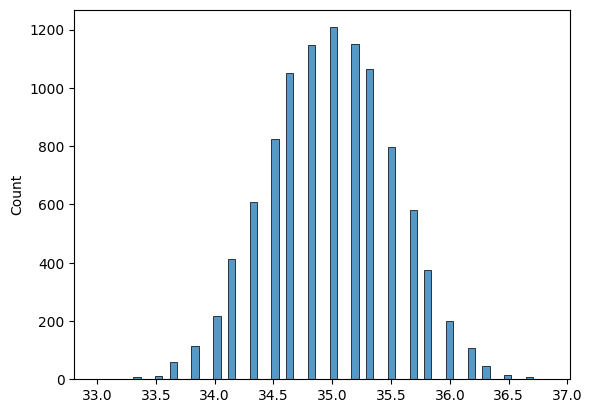

In [43]:
sns.histplot(bootstrapped_means_survey_1)

In [44]:
bootstrapped_means_survey_2=[]
for rep in range(10000):
  bootstrapped_samples=np.random.choice(survey_2,size= n)
  bootstrapped_mean=np.mean(bootstrapped_samples)
  bootstrapped_means_survey_2.append(bootstrapped_mean)


<Axes: ylabel='Count'>

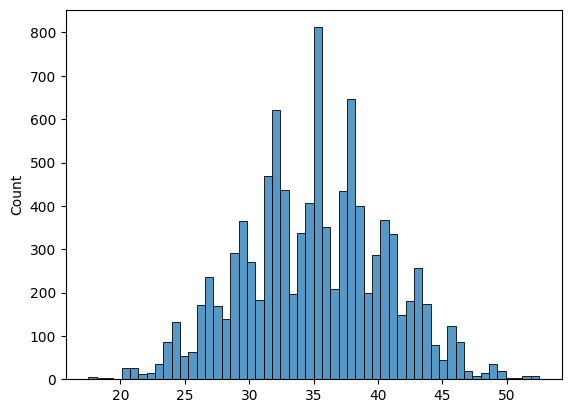

In [45]:
sns.histplot(bootstrapped_means_survey_2)

In [46]:
np.percentile(bootstrapped_means_survey_1,[2.5 , 97.5])

array([34., 36.])

In [47]:
np.percentile(bootstrapped_means_survey_2,[2.5 , 97.5])

array([24., 46.])

#Confidence Intervall
#Cricket Example and Central limit theorem


In [48]:
sehwag=pd.read_csv('sehwag.csv')
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [49]:
sehwag["Runs"].mean()

33.76734693877551

In [50]:
sehwag["Runs"].std()

34.80941899427947

In [51]:
sehwag["Runs"].sample(5)

244    31
174    33
7       0
157    18
215    11
Name: Runs, dtype: int64

In [52]:
np.mean(sehwag["Runs"].sample(5))

76.6

In [53]:
np.mean(sehwag["Runs"].sample(50))

33.8

#sample mean trend
as number of samples increases , we will see more consistency in sample mean

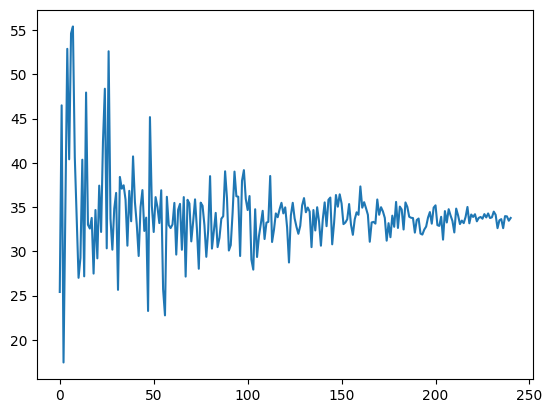

In [54]:
sample_mean_trend=[]
for num_samples in range(5,246):
    sample = sehwag["Runs"].sample(num_samples)
    sample_mean=np.mean(sample)
    sample_mean_trend.append(sample_mean)
plt.plot(sample_mean_trend)

Text(0, 0.5, 'sample mean')

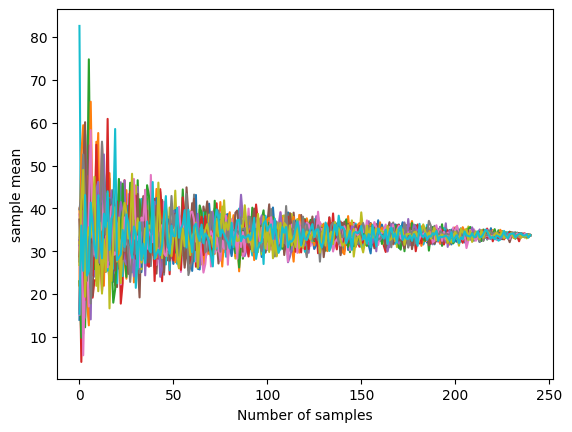

In [55]:
sample_mean_trend=[]
for person in range(20):
  for num_samples in range(5,246):
      sample = sehwag["Runs"].sample(num_samples)
      sample_mean=np.mean(sample)
      sample_mean_trend.append(sample_mean)
  plt.plot(sample_mean_trend)
  sample_mean_trend=[]
plt.xlabel('Number of samples')
plt.ylabel('sample mean')

<Axes: ylabel='Count'>

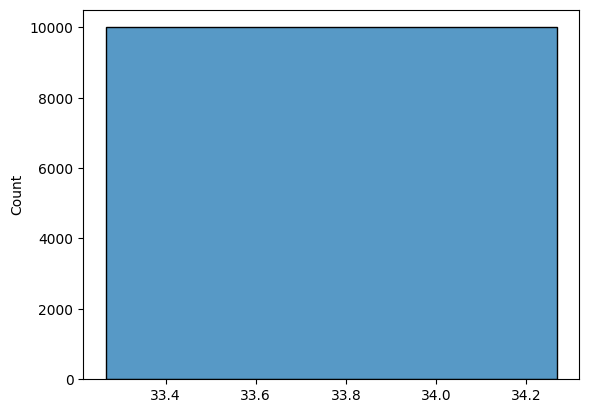

In [56]:
num_sample=10
collect_sample_means=[]
for person in range(10000):
    sample_mean = sehwag["Runs"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)



